# Methodology: Influences of Baby Names in the United States
Maria Cornejo, Renny Tran, and Yazmin Cabrera

Arizona State University, Tempe, AZ 85281, USA

April 20, 2025


#Load Data

In [ ]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/SSN'

# Load data
dfs = []
for year in range(1994, 2024):
    file = os.path.join(folder_path, f'yob{year}.txt')
    if os.path.exists(file):
        df = pd.read_csv(file, names=["name", "sex", "count"])
        df["year"] = year
        dfs.append(df)

names_df = pd.concat(dfs, ignore_index=True)

Mounted at /content/drive


# Add Phonetic Features

In [ ]:
import string

def count_vowels(name):
    return sum(1 for char in name.lower() if char in 'aeiou')

def count_consonants(name):
    return sum(1 for char in name.lower() if char in string.ascii_lowercase and char not in 'aeiou')

names_df['vowel_count'] = names_df['name'].apply(count_vowels)
names_df['consonant_count'] = names_df['name'].apply(count_consonants)
names_df['ends_in_a'] = names_df['name'].str.lower().str.endswith('a')
names_df['ends_in_y'] = names_df['name'].str.lower().str.endswith('y')

#Check Correlations

In [ ]:
correlation = names_df[['vowel_count', 'consonant_count', 'count']].corr()
correlation

,vowel_count,consonant_count,count
vowel_count,1.000000,-0.033351,-0.024819
consonant_count,-0.033351,1.000000,-0.008594
count,-0.024819,-0.008594,1.000000


# Filter and Prepare the Dataset

In [ ]:
model_df = names_df[(names_df['year'] >= 1994) & (names_df['year'] <= 2023)]

X = model_df[['vowel_count', 'consonant_count']]
y = model_df['count']

# Linear Regression (Phonetic)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Linear Regression Results:
MSE: 647712.5211242004
R²: 0.0006652827557819263


# Random Forest Regressor (Phonetic)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Results:")
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R²:", r2_score(y_test, rf_pred))

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

Random Forest Results:
MSE: 646202.3428293616
R²: 0.002995288043686317

Feature Importances:
           Feature  Importance
0      vowel_count    0.620113
1  consonant_count    0.379887


# Random Forest Feature Importances

<ipython-input-7-631af91e8f1c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


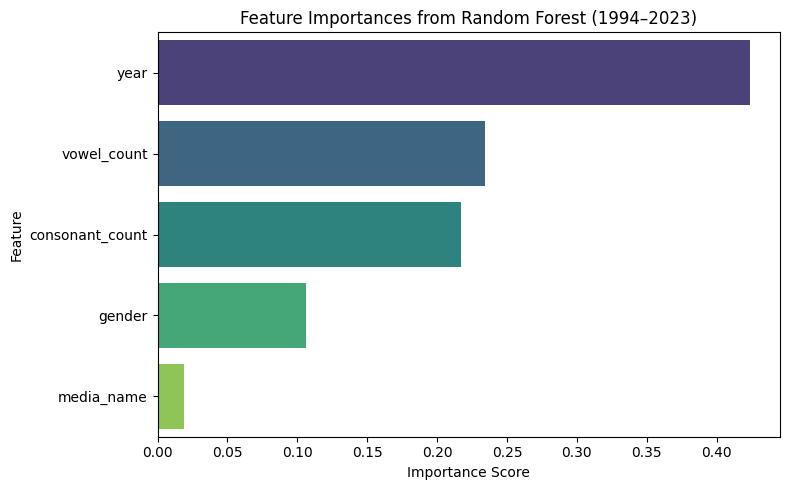

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model_df = names_df[(names_df['year'] >= 1994) & (names_df['year'] <= 2023)].copy()

model_df['gender'] = model_df['sex'].map({'M': 0, 'F': 1})
media_names = ['Arya', 'Bella', 'Elsa', 'Khaleesi', 'Zendaya']
model_df['media_name'] = model_df['name'].isin(media_names).astype(int)

X = model_df[['vowel_count', 'consonant_count', 'year', 'gender', 'media_name']]
y = model_df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importances from Random Forest (1994–2023)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("feature_importance_chart.png")
plt.show()

# Add Year and Gender as Features

In [ ]:
model_df = names_df[(names_df['year'] >= 1994) & (names_df['year'] <= 2023)].copy()

model_df['gender'] = model_df['sex'].map({'M': 0, 'F': 1})

media_names = ['Arya', 'Bella', 'Elsa', 'Khaleesi', 'Zendaya']
model_df['media_name'] = model_df['name'].isin(media_names).astype(int)

X = model_df[['vowel_count', 'consonant_count', 'year', 'gender', 'media_name']]
y = model_df['count']

# Rerun Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression Results (with year, gender, media):")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Linear Regression Results (with year, gender, media):
MSE: 646944.9533932008
R²: 0.0018495382030798702


# Rerun Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Results (with year, gender, media):")
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R²:", r2_score(y_test, rf_pred))

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

Random Forest Results (with year, gender, media):
MSE: 648481.2158116422
R²: -0.0005207114361915899

Feature Importances:
           Feature  Importance
2             year    0.424139
0      vowel_count    0.233944
1  consonant_count    0.216874
3           gender    0.105950
4       media_name    0.019092


# Cultural Name Popularity Trends (1994–2023)

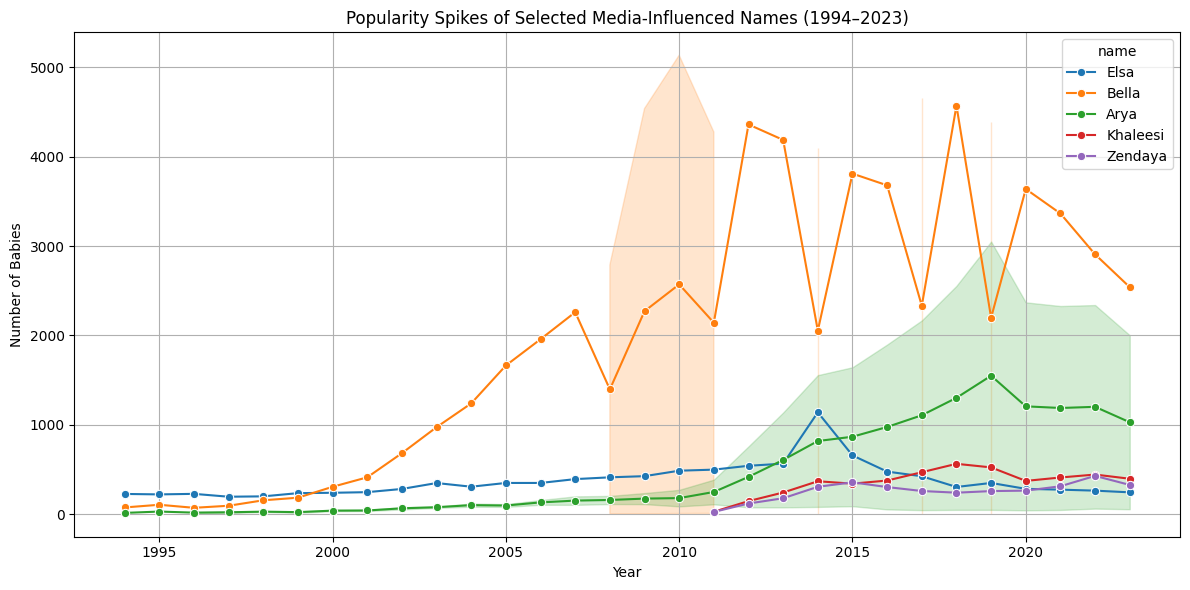

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = names_df[(names_df['year'] >= 1994) & (names_df['year'] <= 2023)]

media_names = ['Arya', 'Bella', 'Elsa', 'Khaleesi', 'Zendaya']

spike_df = plot_df[plot_df['name'].isin(media_names)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=spike_df, x='year', y='count', hue='name', marker="o")
plt.title("Popularity Spikes of Selected Media-Influenced Names (1994–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Babies")
plt.grid(True)
plt.tight_layout()

plt.savefig("media_name_spikes.png")
plt.show()

# Add Syllable Count

In [ ]:
!pip install syllapy

import syllapy
model_df['syllables'] = model_df['name'].apply(lambda x: syllapy.count(x.lower()))

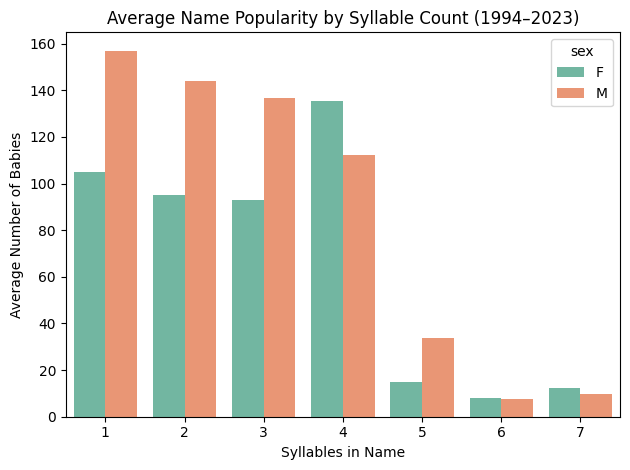

In [ ]:
syllable_group = model_df.groupby(['syllables', 'sex'])['count'].mean().reset_index()

sns.barplot(data=syllable_group, x='syllables', y='count', hue='sex', palette='Set2')
plt.title("Average Name Popularity by Syllable Count (1994–2023)")
plt.xlabel("Syllables in Name")
plt.ylabel("Average Number of Babies")
plt.tight_layout()
plt.savefig("syllable_count_trends.png")
plt.show()

# Predicting Whether a Name Will Be Popular or Not (Classification)

In [ ]:
threshold = model_df.groupby('year')['count'].transform(lambda x: x.quantile(0.9))
model_df['is_popular'] = (model_df['count'] >= threshold).astype(int)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = model_df[['vowel_count', 'consonant_count', 'year', 'gender', 'media_name']]
y = model_df['is_popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    170427
           1       0.92      0.00      0.00     18788

    accuracy                           0.90    189215
   macro avg       0.91      0.50      0.48    189215
weighted avg       0.90      0.90      0.85    189215



# Add Syllable Count to ML Features

In [ ]:
import nltk
nltk.download('cmudict')

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


True

In [ ]:
from nltk.corpus import cmudict
import numpy as np

d = cmudict.dict()

def syllable_count(name):
    try:
        return [len([y for y in x if y[-1].isdigit()]) for x in d[name.lower()]][0]
    except:
        return np.nan

names_df['syllable_count'] = names_df['name'].apply(syllable_count)


# Train Model With Syllables Included



In [ ]:
names_df = names_df.rename(columns={'sex': 'gender'})

media_names = ['Arya', 'Bella', 'Elsa', 'Khaleesi', 'Zendaya']
names_df['media_name'] = names_df['name'].isin(media_names).astype(int)

import nltk
nltk.download('cmudict')
from nltk.corpus import cmudict
import numpy as np
d = cmudict.dict()

def syllable_count(name):
    try:
        return [len([y for y in x if y[-1].isdigit()]) for x in d[name.lower()]][0]
    except:
        return np.nan

names_df['syllable_count'] = names_df['name'].apply(syllable_count)


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [ ]:
features = ['vowel_count', 'consonant_count', 'year', 'gender', 'media_name', 'syllable_count']
model_data = names_df[features + ['count']].dropna()

X = model_data[features]
y = model_data['count']

X['gender'] = X['gender'].map({'M': 0, 'F': 1})

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

<ipython-input-19-c83faa6a7167>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = X['gender'].map({'M': 0, 'F': 1})


MSE: 2068187.2642099976
R²: -0.007085908387280737


# Train on 1994–2020, Predict 2021–2023

In [ ]:
train_df = names_df[(names_df['year'] >= 1994) & (names_df['year'] <= 2020)]
test_df = names_df[(names_df['year'] > 2020) & (names_df['year'] <= 2023)]

features = ['vowel_count', 'consonant_count', 'year', 'gender', 'media_name', 'syllable_count']

X_train = train_df[features].copy()
y_train = train_df['count']

X_test = test_df[features].copy()
y_test = test_df['count']

X_train['gender'] = X_train['gender'].map({'M': 0, 'F': 1})
X_test['gender'] = X_test['gender'].map({'M': 0, 'F': 1})

X_train['media_name'] = X_train['media_name'].astype(int)
X_test['media_name'] = X_test['media_name'].astype(int)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Prediction for 2021–2023")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")


Random Forest Prediction for 2021–2023
MSE: 304602.52
R²: 0.0584


# Predicted vs. Actual

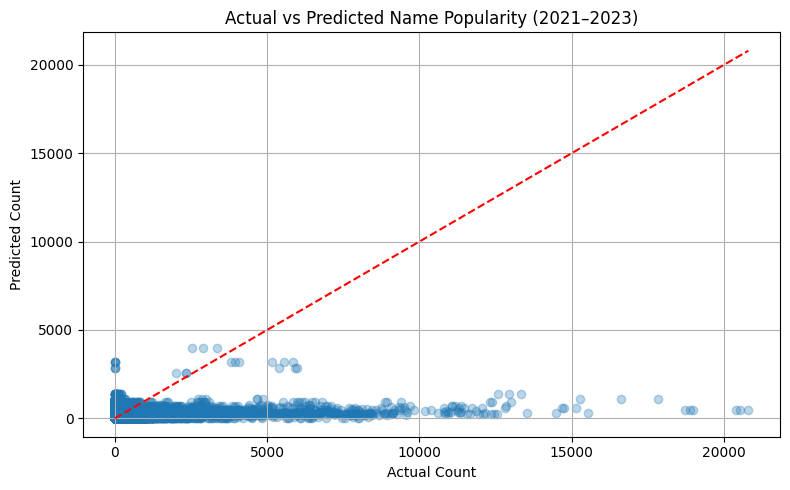

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')
plt.title('Actual vs Predicted Name Popularity (2021–2023)')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.grid(True)
plt.tight_layout()
plt.savefig('future_prediction_accuracy.png')
plt.show()